# Proyectos

# 1. Detección de patrones lingïsticos

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re

**Texto:** El día estaba soleado y la gente caminaba despacio por la plaza.
Los niños jugaban cerca de la fuente, mientras los adultos conversaban tranquilamente. Todo parecía en calma.

In [135]:
texto ="El día estaba soleado y la gente caminaba despacio por la plaza. Los niños jugaban cerca de la fuente, mientras los adultos conversaban tranquilamente. Todo parecía en calma."

Lista de palabras (limpias, sin comas ni puntos):

In [136]:
palabras = re.findall(r'\b\w+\b', texto.lower()) # Convierte todo el contenido de la variable texto a minúsculas.\b significa límite de palabra (inicio o fin).
                                                 #\w+ significa una o más letras, números o guiones bajos (caracteres alfanuméricos).
palabras

['el',
 'día',
 'estaba',
 'soleado',
 'y',
 'la',
 'gente',
 'caminaba',
 'despacio',
 'por',
 'la',
 'plaza',
 'los',
 'niños',
 'jugaban',
 'cerca',
 'de',
 'la',
 'fuente',
 'mientras',
 'los',
 'adultos',
 'conversaban',
 'tranquilamente',
 'todo',
 'parecía',
 'en',
 'calma']

In [137]:
len(palabras) #Tamaño de palabras, 28 palabras

28

In [138]:
# Tabla de datos
df = pd.DataFrame({
    "palabra": palabras,
    "longitud": [len(p) for p in palabras]
})

print(df.head())


   palabra  longitud
0       el         2
1      día         3
2   estaba         6
3  soleado         7
4        y         1


Texto es información cualitativa, para analizalo cuantitativamente necesitamos transformar el texto en números.

La longitud de cada palabra (en caracteres) es una de las formas más comunes y sencillas de convertir un texto en datos numéricos.

La longitud es solo un ejemplo sencillo.

Sobre texto, puedes crear muchas variables numéricas, por ejemplo:

✔ Número de palabras por oración

✔ Número de verbos

✔ Número de sustantivos

✔ Palabras por frase

✔ Frecuencia de una palabra

✔ Porcentaje de uso de una categoría (adjetivos, artículos, etc.)

✔ Puntaje de sentimiento

✔ Cantidad de signos de puntuación

✔ Complejidad léxica

✔ Diversidad léxica (relación entre palabras únicas / totales)


Todas estas pueden convertirse en números y permitir estadísticas descriptivas.

In [139]:
# Estadística descriptiva
print("\nEstadística descriptiva:")
print(df["longitud"].describe())


Estadística descriptiva:
count    28.000000
mean      5.107143
std       3.034850
min       1.000000
25%       2.750000
50%       5.000000
75%       7.000000
max      14.000000
Name: longitud, dtype: float64


In [140]:
#Frecuencia de palabras
frecuencias = Counter(palabras)
df_freq = pd.DataFrame(frecuencias.items(), columns=["palabra", "frecuencia"])
print(df_freq.sort_values("frecuencia", ascending=False))

           palabra  frecuencia
5               la           3
11             los           2
0               el           1
3          soleado           1
1              día           1
4                y           1
6            gente           1
7         caminaba           1
2           estaba           1
8         despacio           1
9              por           1
10           plaza           1
12           niños           1
13         jugaban           1
14           cerca           1
15              de           1
16          fuente           1
17        mientras           1
18         adultos           1
19     conversaban           1
20  tranquilamente           1
21            todo           1
22         parecía           1
23              en           1
24           calma           1


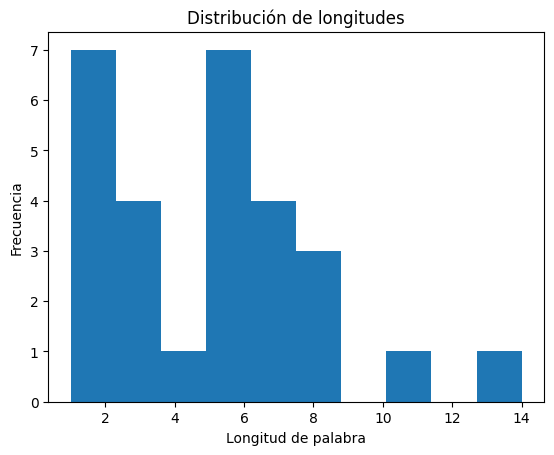

In [141]:
#Gráficas
plt.hist(df["longitud"])
plt.xlabel("Longitud de palabra")
plt.ylabel("Frecuencia")
plt.title("Distribución de longitudes")
plt.show()

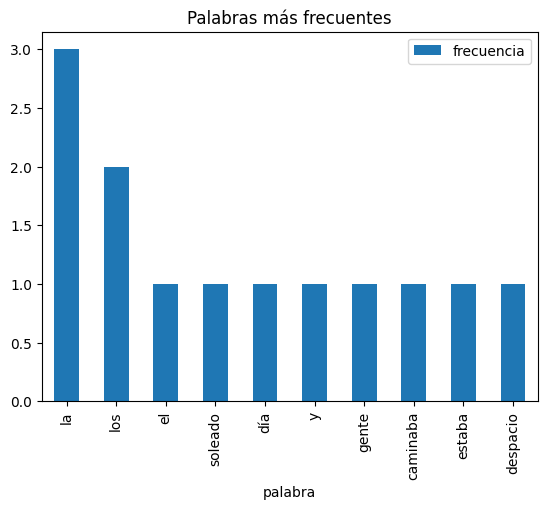

In [142]:
df_freq.sort_values("frecuencia", ascending=False).head(10).plot(
    x="palabra", y="frecuencia", kind="bar"
)
plt.title("Palabras más frecuentes")
plt.show()

# 2 “Análisis de datos y detección de fallos operativos en una torre empacada de absorción aire–CO₂ mediante series temporales”

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [144]:
np.random.seed(42)
#Generar señal sintética
# --- 1. Segmento normal ---
n1 = 500
normal = np.random.normal(loc=0.08, scale=0.02, size=n1)

# --- 2. Segmento pre-flooding ---
n2 = 300
pref = np.random.normal(loc=0.12, scale=0.06, size=n2)

# --- 3. Segmento flooding ---
n3 = 300
flood = np.random.normal(loc=0.25, scale=0.15, size=n3)

# Añadir picos fuertes (outliers)
outliers = np.random.choice(n3, size=20, replace=False)
flood[outliers] += np.random.uniform(0.3, 0.8, size=20)

# Asegurar que no haya negativos
flood = np.clip(flood, 0, None)
pref = np.clip(pref, 0, None)
normal = np.clip(normal, 0, None)

# --- 4. Segmento recuperación ---
n4 = 250
rec = np.random.normal(loc=0.1, scale=0.03, size=n4)
rec = np.clip(rec, 0, None)

# Unir todo
co2 = np.concatenate([normal, pref, flood, rec])

# Crear tiempos sintéticos
time = pd.date_range(start="2025-10-15 10:00", periods=len(co2), freq="S")  # cada segundo

df = pd.DataFrame({
    "Time": time,
    "CO2": co2
})

print(df.head())
print(df.tail())



                 Time       CO2
0 2025-10-15 10:00:00  0.089934
1 2025-10-15 10:00:01  0.077235
2 2025-10-15 10:00:02  0.092954
3 2025-10-15 10:00:03  0.110461
4 2025-10-15 10:00:04  0.075317
                    Time       CO2
1345 2025-10-15 10:22:25  0.071698
1346 2025-10-15 10:22:26  0.109113
1347 2025-10-15 10:22:27  0.058699
1348 2025-10-15 10:22:28  0.121540
1349 2025-10-15 10:22:29  0.150266


/tmp/ipython-input-1629780683.py:33: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  time = pd.date_range(start="2025-10-15 10:00", periods=len(co2), freq="S")  # cada segundo


In [145]:
df.to_csv("datos_sinteticos_CO2.csv", index=False)


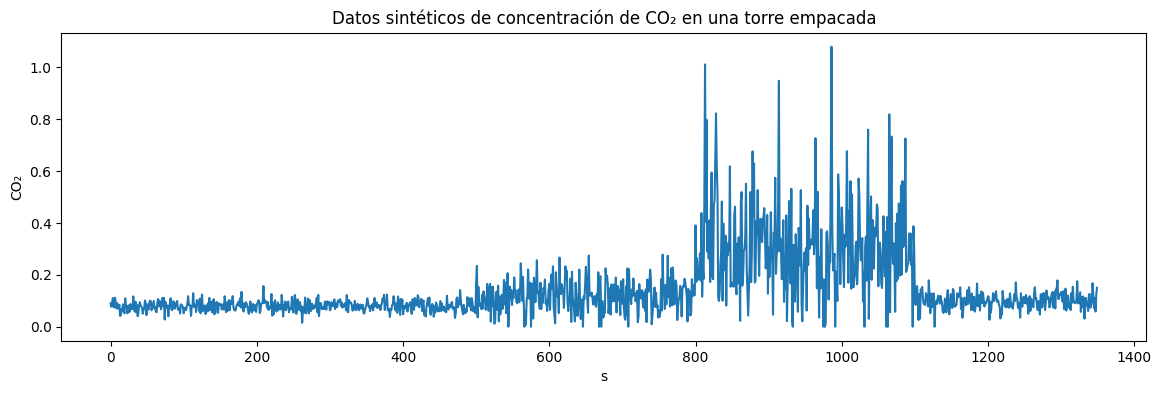

In [146]:
plt.figure(figsize=(14,4))
plt.plot(df["CO2"])
plt.title("Datos sintéticos de concentración de CO₂ en una torre empacada")
plt.xlabel("s")
plt.ylabel("CO₂")
plt.show()


In [147]:
from google.colab import files
#files.download("datos_sinteticos_CO2.csv")



# 2

In [148]:
#Cargar los datos
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/datos_sinteticos_CO2.csv"
df = pd.read_csv(ruta, parse_dates=["Time"])
df.head()

,Time,CO2
0,2025-10-15 10:00:00,0.089934
1,2025-10-15 10:00:01,0.077235
2,2025-10-15 10:00:02,0.092954
3,2025-10-15 10:00:03,0.110461
4,2025-10-15 10:00:04,0.075317


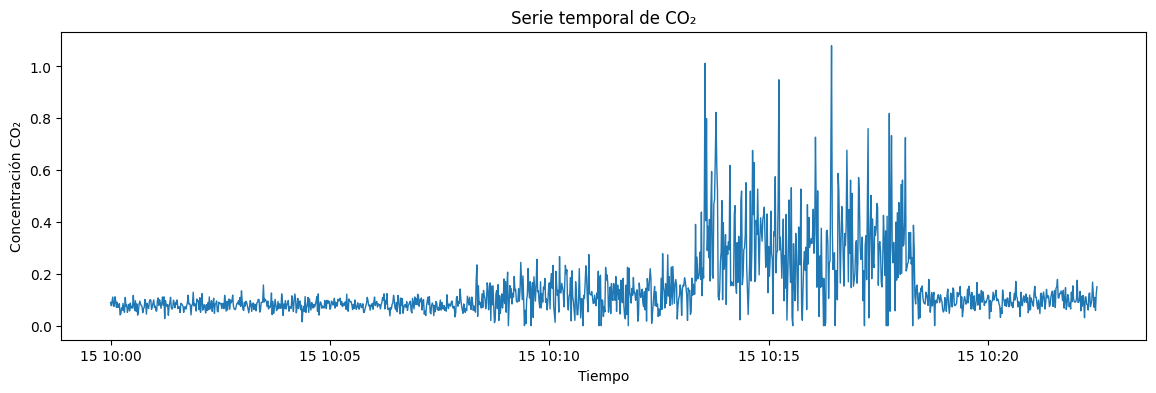

In [149]:
#serie
plt.figure(figsize=(14,4))
plt.plot(df["Time"], df["CO2"], linewidth=1)
plt.title("Serie temporal de CO₂")
plt.xlabel("Tiempo")
plt.ylabel("Concentración CO₂")
plt.show()


In [150]:
#Resumen estadístico
df["CO2"].describe()


,CO2
count,1350.000000
mean,0.142912
std,0.126291
min,0.000000
25%,0.075020
50%,0.098246
75%,0.155346
max,1.079753


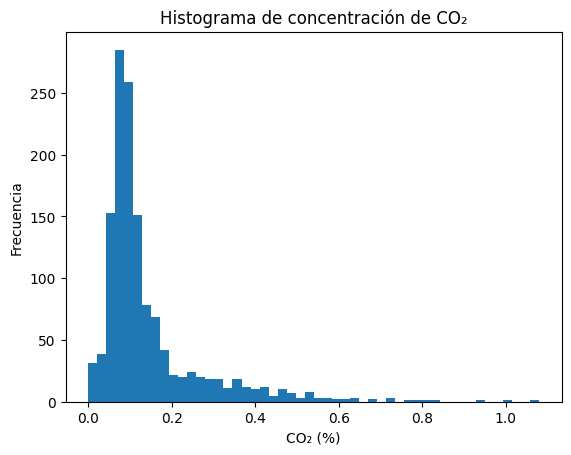

In [151]:
#histograma
plt.hist(df["CO2"], bins=50)
plt.title("Histograma de concentración de CO₂")
plt.xlabel("CO₂ (%)")
plt.ylabel("Frecuencia")
plt.show()


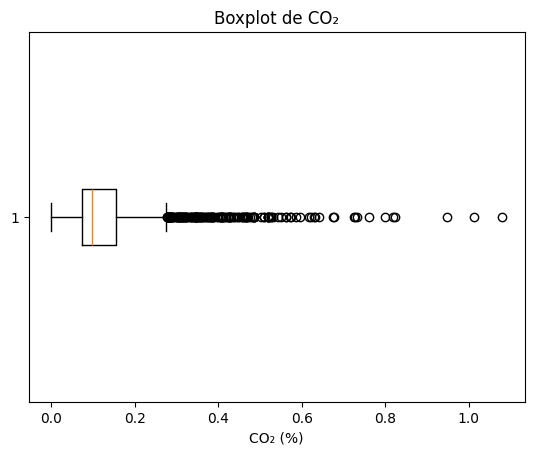

In [152]:
#Gráfico de cajas
plt.boxplot(df["CO2"], vert=False)
plt.title("Boxplot de CO₂")
plt.xlabel("CO₂ (%)")
plt.show()


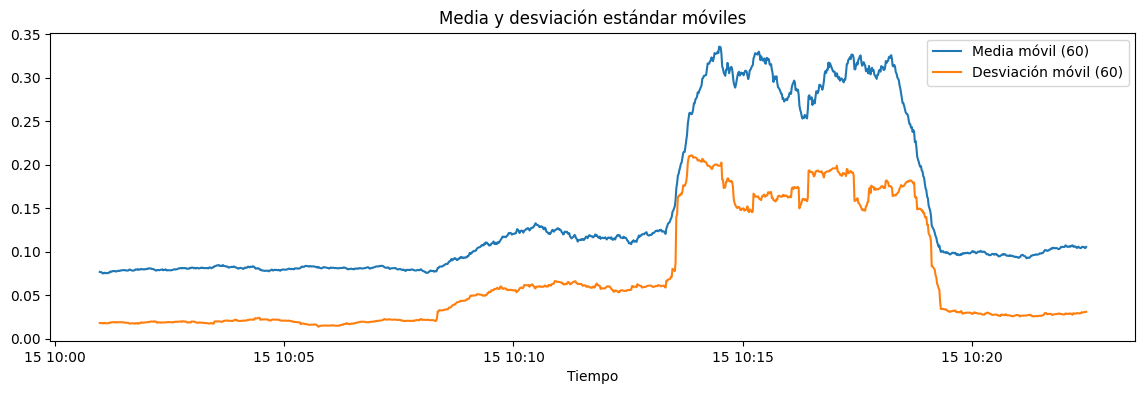

In [153]:
#Tendencia
df["rolling_mean"] = df["CO2"].rolling(window=60).mean()
df["rolling_std"]  = df["CO2"].rolling(window=60).std()

plt.figure(figsize=(14,4))
plt.plot(df["Time"], df["rolling_mean"], label="Media móvil (60)")
plt.plot(df["Time"], df["rolling_std"], label="Desviación móvil (60)")
plt.legend()
plt.title("Media y desviación estándar móviles")
plt.xlabel("Tiempo")
plt.show()


“El análisis exploratorio sirve para entender el comportamiento de la serie.
En un proceso real, cuando la torre se inunda, la señal de CO₂ se vuelve caótica: aparecen picos, aumenta la desviación estándar y la distribución se deforma.
El EDA nos permite identificar esos cambios sin necesidad de modelos complicados.”

Segmentación: La idea es dividir la serie en zonas operativas:

Antes del flooding → operación normal

Transición / pre-flooding

Flooding (inundación)

Recuperación

Esto es muy común en ingeniería de procesos: separar un proceso continuo en regímenes dinámicos para entender qué está pasando.

# Segmentación de la serie temporal

Como estamos usando datos sintéticos, ya sabemos aproximadamente dónde está el flooding:

Segmento normal: primeros 500 datos

Pre-flooding: 500 a 800

Flooding: 800 a 1100

Recuperación: 1100 al final

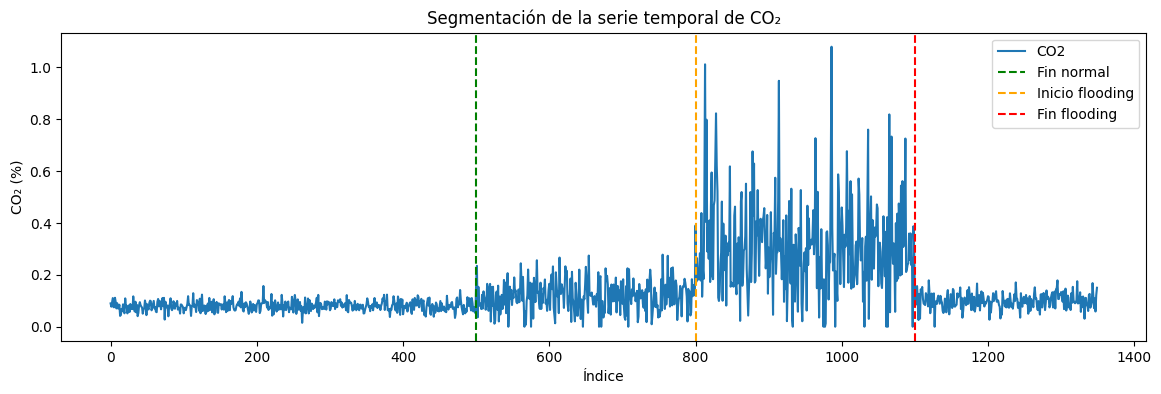

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(df["CO2"], label="CO2")

plt.axvline(500, color='green', linestyle='--', label="Fin normal")
plt.axvline(800, color='orange', linestyle='--', label="Inicio flooding")
plt.axvline(1100, color='red', linestyle='--', label="Fin flooding")

plt.title("Segmentación de la serie temporal de CO₂")
plt.xlabel("Índice")
plt.ylabel("CO₂ (%)")
plt.legend()
plt.show()


Se aprecian claramente cuatro zonas.

La variabilidad cambia radicalmente en flooding.

Las líneas verticales ayudan a visualizar transiciones de régimen.

In [155]:
#Crear las cuatro secciones

normal = df.iloc[:500]
preflood = df.iloc[500:800]
flood = df.iloc[800:1100]
recover = df.iloc[1100:]


In [156]:
#Resumen estadístico por segmento
print("Normal:\n", normal["CO2"].describe())
print("\nPre-flooding:\n", preflood["CO2"].describe())
print("\nFlooding:\n", flood["CO2"].describe())
print("\nRecuperación:\n", recover["CO2"].describe())


Normal:
 count    500.000000
mean       0.080137
std        0.019625
min        0.015175
25%        0.065994
50%        0.080256
75%        0.092736
max        0.157055
Name: CO2, dtype: float64

Pre-flooding:
 count    300.000000
mean       0.118497
std        0.058308
min        0.000000
25%        0.077792
50%        0.119694
75%        0.157027
max        0.277943
Name: CO2, dtype: float64

Flooding:
 count    300.000000
mean       0.307730
std        0.176557
min        0.000000
25%        0.181907
50%        0.286536
75%        0.405239
max        1.079753
Name: CO2, dtype: float64

Recuperación:
 count    250.000000
mean       0.099980
std        0.030199
min        0.000000
25%        0.078893
50%        0.099809
75%        0.121078
max        0.178876
Name: CO2, dtype: float64


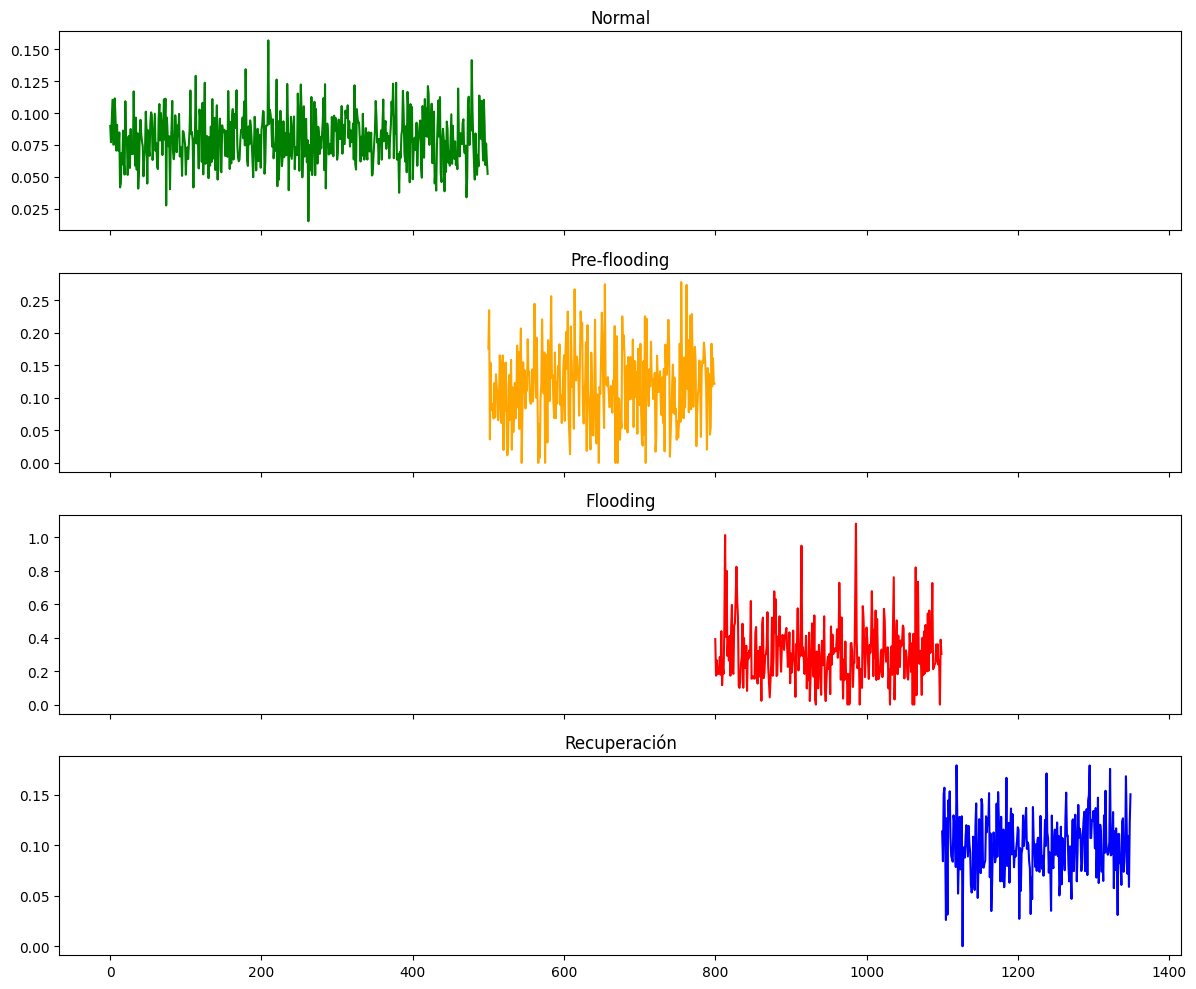

In [157]:
#Visualizar cada segmento
fig, ax = plt.subplots(4,1, figsize=(12,10), sharex=True)

ax[0].plot(normal["CO2"], color="green")
ax[0].set_title("Normal")

ax[1].plot(preflood["CO2"], color="orange")
ax[1].set_title("Pre-flooding")

ax[2].plot(flood["CO2"], color="red")
ax[2].set_title("Flooding")

ax[3].plot(recover["CO2"], color="blue")
ax[3].set_title("Recuperación")

plt.tight_layout()
plt.show()


In [158]:
#Estadísticas comparativas entre segmentos
def resumen(segmento):
    return pd.Series({
        "media": segmento["CO2"].mean(),
        "mediana": segmento["CO2"].median(),
        "std": segmento["CO2"].std(),
        "min": segmento["CO2"].min(),
        "max": segmento["CO2"].max(),
        "IQR": segmento["CO2"].quantile(0.75) - segmento["CO2"].quantile(0.25),
        "coef_var": segmento["CO2"].std() / segmento["CO2"].mean()
    })

stats = pd.DataFrame({
    "Normal": resumen(normal),
    "Pre-flooding": resumen(preflood),
    "Flooding": resumen(flood),
    "Recuperación": resumen(recover)
})

stats


,Normal,Pre-flooding,Flooding,Recuperación
media,0.080137,0.118497,0.307730,0.099980
mediana,0.080256,0.119694,0.286536,0.099809
std,0.019625,0.058308,0.176557,0.030199
min,0.015175,0.000000,0.000000,0.000000
max,0.157055,0.277943,1.079753,0.178876
IQR,0.026742,0.079235,0.223331,0.042185
coef_var,0.244895,0.492064,0.573740,0.302047


/tmp/ipython-input-661248646.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([normal["CO2"], preflood["CO2"], flood["CO2"], recover["CO2"]],


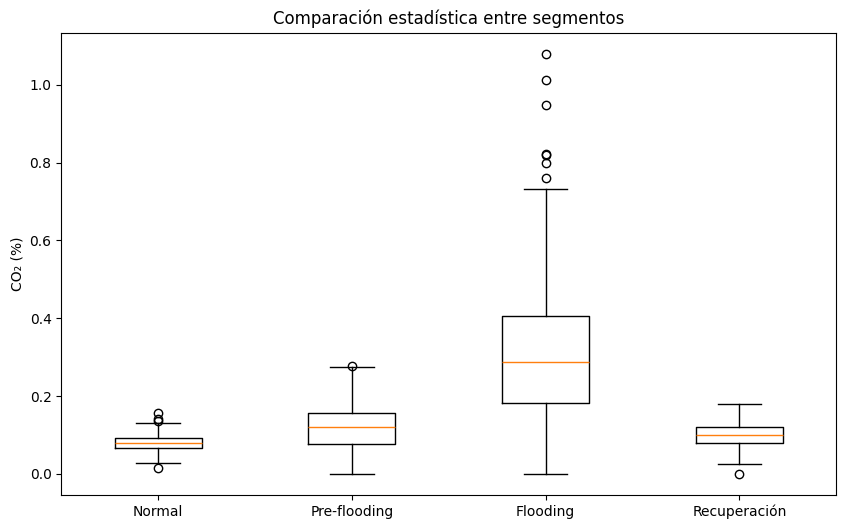

In [159]:
#Gráfico de cajas por segmento
plt.figure(figsize=(10,6))
plt.boxplot([normal["CO2"], preflood["CO2"], flood["CO2"], recover["CO2"]],
            labels=["Normal", "Pre-flooding", "Flooding", "Recuperación"])
plt.ylabel("CO₂ (%)")
plt.title("Comparación estadística entre segmentos")
plt.show()


Conclusión: un proceso químico deja huellas estadísticas cuando cambia de régimen:

Más ruido

Más dispersión

Más picos

Más variabilidad

- Esto es precisamente lo que ocurre cuando una torre empacada se inunda.

# Autocorrrelación


¿Qué es la autocorrelación?

Es una medida de qué tanto un dato se parece a otro que ocurrió antes.

Si la torre opera normal → los datos cambian lentamente → alta autocorrelación.

Si hay flooding → el proceso se vuelve caótico → la autocorrelación baja.
 En ingeniería, la autocorrelación revela estabilidad o inestabilidad de un proceso.

<Figure size 1200x400 with 0 Axes>

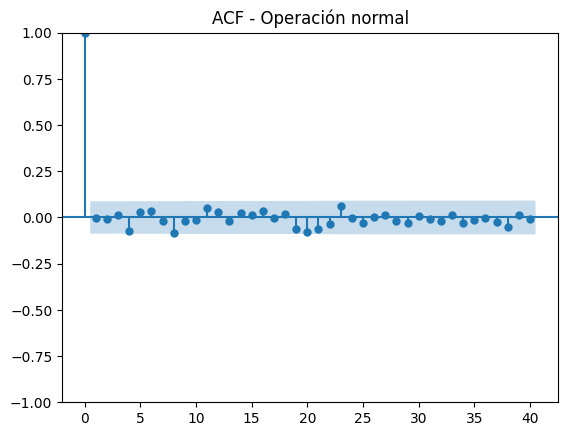

<Figure size 1200x400 with 0 Axes>

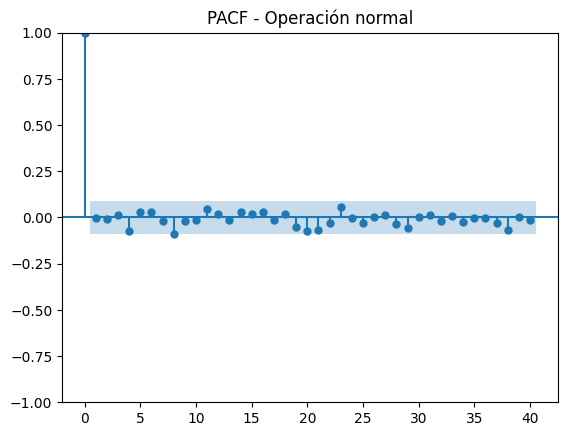

In [160]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,4))
plot_acf(normal["CO2"], lags=40)
plt.title("ACF - Operación normal")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(normal["CO2"], lags=40, method='ywm')
plt.title("PACF - Operación normal")
plt.show()


<Figure size 1200x400 with 0 Axes>

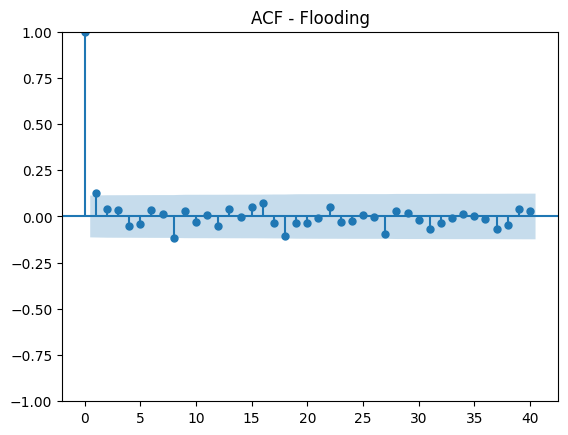

<Figure size 1200x400 with 0 Axes>

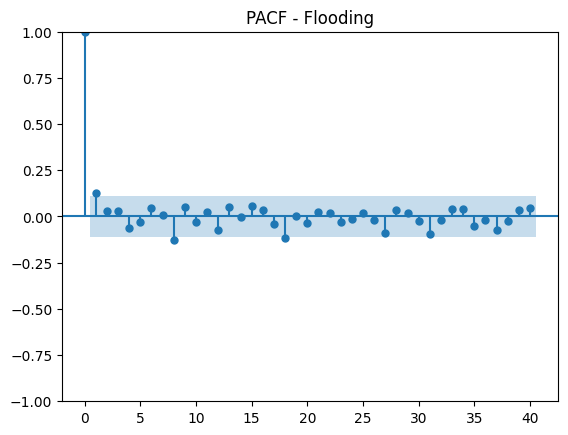

In [161]:
plt.figure(figsize=(12,4))
plot_acf(flood["CO2"], lags=40)
plt.title("ACF - Flooding")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(flood["CO2"], lags=40, method='ywm')
plt.title("PACF - Flooding")
plt.show()


# 3. Análisis multivariable de contaminantes

In [162]:
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/contam2022.csv"

In [163]:
df=pd.read_csv(ruta, parse_dates = True, index_col=0)
df.head()

,Centro Ozono,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,Centro PM10
Fecha,,,,,
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000


In [164]:
df.columns = ['ozono','dioxido_azufre',
                  'dioxido_nitrogeno','monoxido_carbono',
                  'PM10'] #Renombrar las columnas de tu DataFrame llamado

In [165]:
df.head()

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
Fecha,,,,,
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000


In [166]:
#  Inspección básica

print("Columnas:\n", df.columns, "\n")
print(df.info())
df.describe()


Columnas:
 Index(['ozono', 'dioxido_azufre', 'dioxido_nitrogeno', 'monoxido_carbono',
       'PM10'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ozono              365 non-null    float64
 1   dioxido_azufre     365 non-null    float64
 2   dioxido_nitrogeno  365 non-null    float64
 3   monoxido_carbono   365 non-null    float64
 4   PM10               365 non-null    float64
dtypes: float64(5)
memory usage: 17.1 KB
None


,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,27.238470,7.128311,15.446575,5.365868,49.600000
std,10.683100,5.100674,3.789316,1.750875,18.261962
min,9.625000,2.000000,7.458333,2.208333,15.125000
25%,18.666667,4.000000,12.500000,4.041667,35.583333
50%,25.708333,5.666667,15.250000,5.083333,48.000000
75%,33.916667,8.416667,17.875000,6.291667,61.250000
max,67.000000,34.416667,29.666667,12.000000,106.916667


# 4. Secado de manzana

In [167]:
!pip install scipy --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [168]:
# Tiempos en minutos
tiempo = np.array([0, 10, 20, 30, 45, 60, 75, 90, 120, 150, 180])

# Masa húmeda de la muestra (g) - DATOS SINTÉTICOS
masa = np.array([100, 92, 85, 79, 72, 68, 64, 61, 57, 54, 52])

df = pd.DataFrame({
    "tiempo_min": tiempo,
    "masa_g": masa
})

df


,tiempo_min,masa_g
0,0,100
1,10,92
2,20,85
3,30,79
4,45,72
5,60,68
6,75,64
7,90,61
8,120,57
9,150,54


humedad base seca y MR

In [169]:
masa_seca = 50.0  # g, asumida

# masa de agua en cada tiempo
masa_agua = df["masa_g"] - masa_seca

# Humedad base seca: X = (masa de agua) / (masa seca)
df["X_bs"] = masa_agua / masa_seca

# Humedad inicial y (suponemos) humedad de equilibrio Xe ~ 0
X0 = df["X_bs"].iloc[0]
Xe = 0.0

# Moisture Ratio MR = (X - Xe) / (X0 - Xe) ≈ X / X0
df["MR"] = df["X_bs"] / X0

df


,tiempo_min,masa_g,X_bs,MR
0,0,100,1.00,1.00
1,10,92,0.84,0.84
2,20,85,0.70,0.70
3,30,79,0.58,0.58
4,45,72,0.44,0.44
5,60,68,0.36,0.36
6,75,64,0.28,0.28
7,90,61,0.22,0.22
8,120,57,0.14,0.14
9,150,54,0.08,0.08


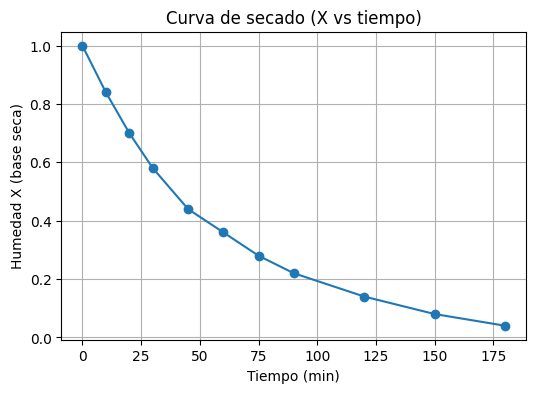

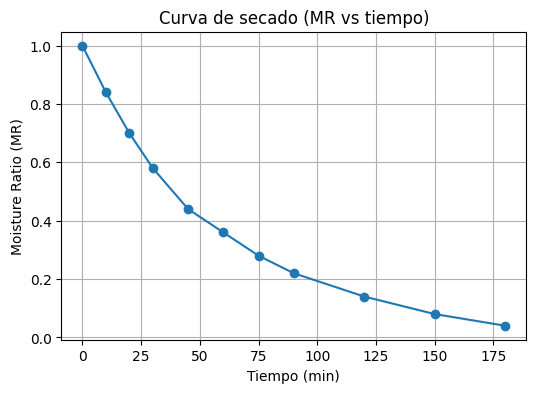

In [170]:
#Curva de secado
plt.figure(figsize=(6,4))
plt.plot(df["tiempo_min"], df["X_bs"], marker="o")
plt.xlabel("Tiempo (min)")
plt.ylabel("Humedad X (base seca)")
plt.title("Curva de secado (X vs tiempo)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df["tiempo_min"], df["MR"], marker="o")
plt.xlabel("Tiempo (min)")
plt.ylabel("Moisture Ratio (MR)")
plt.title("Curva de secado (MR vs tiempo)")
plt.grid(True)
plt.show()


In [171]:
#Velocidad de secado
# Diferencias entre puntos
dX = np.diff(df["X_bs"].values)
dt = np.diff(df["tiempo_min"].values)

#  secado (positiva)
DR = -dX / dt  # signo menos porque X disminuye

# Definimos el tiempo intermedio para graficar
t_mid = (df["tiempo_min"].values[:-1] + df["tiempo_min"].values[1:]) / 2

df_DR = pd.DataFrame({
    "tiempo_mid": t_mid,
    "DR": DR
})

df_DR


,tiempo_mid,DR
0,5.0,0.016000
1,15.0,0.014000
2,25.0,0.012000
3,37.5,0.009333
4,52.5,0.005333
5,67.5,0.005333
6,82.5,0.004000
7,105.0,0.002667
8,135.0,0.002000
9,165.0,0.001333


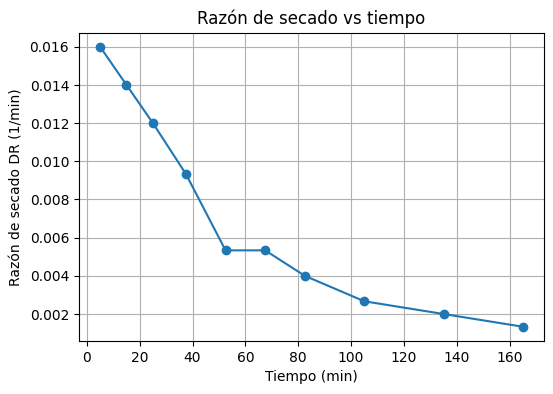

In [172]:
plt.figure(figsize=(6,4))
plt.plot(df_DR["tiempo_mid"], df_DR["DR"], marker="o")
plt.xlabel("Tiempo (min)")
plt.ylabel("Razón de secado DR (1/min)")
plt.title("Razón de secado vs tiempo")
plt.grid(True)
plt.show()


In [173]:
#Ajuste de modelo
def newton_model(t, k):
    return np.exp(-k * t)

t_data = df["tiempo_min"].values
MR_data = df["MR"].values

# Ajuste de parámetros
popt_newton, pcov_newton = curve_fit(newton_model, t_data, MR_data, p0=[0.01])
k_newton = popt_newton[0]

print("Parámetro modelo de Newton:")
print(f"k = {k_newton:.5f}  (1/min)")


Parámetro modelo de Newton:
k = 0.01734  (1/min)


In [174]:
#Modelo Page
def page_model(t, k, n):
    return np.exp(-k * t**n)

popt_page, pcov_page = curve_fit(page_model, t_data, MR_data, p0=[0.01, 1.0])
k_page, n_page = popt_page

print("Parámetros modelo de Page:")
print(f"k = {k_page:.5f}  (1/min^n)")
print(f"n = {n_page:.5f}")


Parámetros modelo de Page:
k = 0.02023  (1/min^n)
n = 0.96197


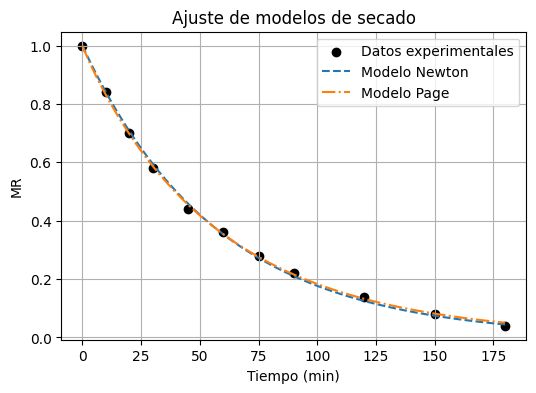

In [175]:
#comparar modelo con datos
t_fit = np.linspace(0, df["tiempo_min"].max(), 200)

MR_newton_fit = newton_model(t_fit, k_newton)
MR_page_fit = page_model(t_fit, k_page, n_page)

plt.figure(figsize=(6,4))
plt.scatter(t_data, MR_data, label="Datos experimentales", color="black")
plt.plot(t_fit, MR_newton_fit, label="Modelo Newton", linestyle="--")
plt.plot(t_fit, MR_page_fit, label="Modelo Page", linestyle="-.")

plt.xlabel("Tiempo (min)")
plt.ylabel("MR")
plt.title("Ajuste de modelos de secado")
plt.legend()
plt.grid(True)
plt.show()


In [176]:
#Métricas para evaluar los modelos
from sklearn.metrics import mean_squared_error

MR_newton_pred = newton_model(t_data, k_newton)
MR_page_pred = page_model(t_data, k_page, n_page)

rmse_newton = np.sqrt(mean_squared_error(MR_data, MR_newton_pred))
rmse_page = np.sqrt(mean_squared_error(MR_data, MR_page_pred))

print(f"RMSE Newton: {rmse_newton:.5f}")
print(f"RMSE Page:   {rmse_page:.5f}")


RMSE Newton: 0.00988
RMSE Page:   0.00741


# 5. Covid-México

https://www.gob.mx/salud/documentos/datos-abiertos-bases-historicas-direccion-general-de-epidemiologia

In [177]:
#from google.colab import files

#uploaded = files.upload()  # Ejecuta esto y selecciona el archivo .csv


In [179]:
import pandas as pd

filename = "COVID19MEXICO.csv"  # CAMBIA esto por el nombre real

# Primero intentamos con separador coma
try:
    df = pd.read_csv(filename, low_memory=False, encoding="latin1")
    print("Leído con separador por defecto (coma).")
except Exception as e:
    print("No se pudo leer con coma. Error:", e)
    print("Intentando con separador '|' ...")
    df = pd.read_csv(filename, sep="|", low_memory=False, encoding="latin1")
    print("Leído con separador '|'.")

# Ver primeras filas
df.head()


No se pudo leer con coma. Error: [Errno 2] No such file or directory: 'COVID19MEXICO.csv'
Intentando con separador '|' ...


FileNotFoundError: [Errno 2] No such file or directory: 'COVID19MEXICO.csv'

In [ ]:
print("Número de filas y columnas:", df.shape)
print("\nColumnas:")
print(df.columns.tolist())

df.info()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("COVID19MEXICO.csv", encoding="latin1", low_memory=False)
df.head()


In [ ]:
conteo_sexo = df["SEXO"].replace({1:"Mujer", 2:"Hombre"}).value_counts()
conteo_sexo.plot(kind="bar")
plt.title("Casos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de casos")
plt.show()

In [ ]:
plt.hist(df["EDAD"], bins=40)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
comorbilidades = ["DIABETES", "OBESIDAD", "HIPERTENSION", "EPOC", "ASMA"]
conteos = df[comorbilidades].sum()

plt.figure(figsize=(8,4))
conteos.plot(kind="bar")
plt.title("Comorbilidades frecuentes")
plt.ylabel("Número de casos")
plt.show()


In [ ]:
df["TIPO_PACIENTE"].replace({1:"Ambulatorio", 2:"Hospitalizado"}).value_counts().plot(kind="bar")
plt.title("Tipo de paciente")
plt.ylabel("Número de casos")
plt.show()


In [ ]:
# Preparar los datos
tipo_paciente = df["TIPO_PACIENTE"].replace({1:"Ambulatorio", 2:"Hospitalizado"}).value_counts()

# Crear la figura con tamaño personalizado
plt.figure(figsize=(10, 6))

# Crear gráfico de barras con colores personalizados
colores = ['#2ecc71', '#e74c3c']  # Verde para ambulatorio, rojo para hospitalizado
barras = plt.bar(tipo_paciente.index, tipo_paciente.values, color=colores, alpha=0.8, edgecolor='black', linewidth=1.2)

# Agregar etiquetas con los valores encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., altura,
             f'{int(altura):,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Personalizar títulos y etiquetas
plt.title("Distribución de Casos por Tipo de Paciente", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Tipo de Paciente", fontsize=12, fontweight='bold')
plt.ylabel("Número de Casos", fontsize=12, fontweight='bold')

# Mejorar la apariencia general
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

plt.show()

In [ ]:
# Convertir la columna FECHA_SINTOMAS a formato fecha
df["FECHA_SINTOMAS"] = pd.to_datetime(df["FECHA_SINTOMAS"], errors="coerce")



In [ ]:
casos_por_fecha = df.groupby("FECHA_SINTOMAS").size().sort_index()
casos_por_fecha.head()


In [ ]:
plt.figure(figsize=(14,5))
casos_por_fecha.plot()

plt.title("Casos nuevos por fecha de inicio de síntomas")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(14,5))
casos_por_fecha.rolling(7).mean().plot()

plt.title("Casos por fecha (Media móvil de 7 días)")
plt.xlabel("Fecha")
plt.ylabel("Casos (promedio semanal)")
plt.grid(True)
plt.show()


In [ ]:
df["SEXO"] = df["SEXO"].replace({1: "Mujer", 2: "Hombre"})

casos_sexo = df.groupby(["FECHA_SINTOMAS", "SEXO"]).size().unstack()

plt.figure(figsize=(14,5))
casos_sexo.rolling(7).mean().plot()
plt.title("Casos por fecha y sexo (promedio móvil 7 días)")
plt.xlabel("Fecha")
plt.ylabel("Casos")
plt.show()


In [ ]:
#Correlación
variables = [
    "EDAD",
    "DIABETES",
    "OBESIDAD",
    "HIPERTENSION",
    "EPOC",
    "ASMA",
    "TABAQUISMO",
    "UCI",
    "INTUBADO",
    "TIPO_PACIENTE"
]


In [ ]:
df_corr = df[variables].copy()


In [ ]:
df_corr = df_corr.replace({97: np.nan, 98: np.nan, 99: np.nan})


In [ ]:
corr = df_corr.corr(method="spearman")
corr


In [ ]:
plt.figure(figsize=(10, 8),dpi=150)
sns.heatmap(corr, annot=True,
            cmap='coolwarm',
            linewidths=0.2,
            cbar_kws={'label': 'Coeficiente de Spearman'},
           vmin = -1, vmax = 1, center = 0)
plt.title('Matriz de Correlación', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 6. Exploración cuantitativa de textos literarios

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
!pip install pdfplumber
import pdfplumber


In [ ]:
import pdfplumber #Extraer el texto del PDF

# Cambiar por el nombre del archivo subido
archivo_pdf = "continuidad.pdf"

texto = ""

with pdfplumber.open(archivo_pdf) as pdf:
    for pagina in pdf.pages:
        texto += pagina.extract_text() + " "


In [ ]:
texto[:500]


Limpiar el texto

pasar a minúsculas

quitar signos

eliminar números

eliminar saltos de línea

In [ ]:
import re

texto_limpio = texto.lower()
texto_limpio = re.sub(r"[^a-záéíóúñü\s]", "", texto_limpio)
texto_limpio = texto_limpio.replace("\n", " ")


In [ ]:
#Tokenizar (separar en palabras)
palabras = texto_limpio.split()
len(palabras) #Total de palabras

In [ ]:
#Frecuencia de palabras
from collections import Counter

frecuencias = Counter(palabras)
frecuencias.most_common(10)

In [ ]:
#Eliminar stopwords (palabras muy comunes)
stopwords = [
    "el", "la", "los", "las", "y", "de", "que", "en", "a", "un", "una",
    "se", "con", "por", "del", "al", "su", "sus", "lo"
]

palabras_filtradas = [p for p in palabras if p not in stopwords]

frecuencias_filtradas = Counter(palabras_filtradas)
frecuencias_filtradas.most_common(10)


In [ ]:
# import matplotlib.pyplot as plt

top = frecuencias_filtradas.most_common(10)

pal, frec = zip(*top)

plt.figure(figsize=(8,4))
plt.bar(pal, frec)
plt.xticks(rotation=45)
plt.title("Palabras más frecuentes")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
# Dividimos el texto en 3 partes
n = len(palabras_filtradas)
p1 = palabras_filtradas[0 : n//3]
p2 = palabras_filtradas[n//3 : 2*n//3]
p3 = palabras_filtradas[2*n//3 :]

Counter(p1).most_common(5), Counter(p2).most_common(5), Counter(p3).most_common(5)


# 7.Estabilidad de galletas funcionales

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error


In [ ]:
# Actividad de agua (ejemplo de 8 sales)
aw = np.array([0.11, 0.23, 0.33, 0.43, 0.53, 0.64, 0.75, 0.84])

# Parámetros "reales" para generar una isoterma tipo GAB (ejemplo)
Xm_true = 0.08   # humedad monomolecular (kg agua/kg sólidos secos)
C_true  = 10.0
k_true  = 0.90

def gab_model(aw, Xm, C, k):
    return (Xm * C * k * aw) / ((1 - k*aw) * (1 - k*aw + C*k*aw))

# Generamos X sintética con un poco de ruido
X_clean = gab_model(aw, Xm_true, C_true, k_true)
np.random.seed(42)
X = X_clean + np.random.normal(scale=0.003, size=len(aw))  # ruidecito pequeño

df = pd.DataFrame({"aw": aw, "X": X})
df


In [ ]:
def bet_model(aw, Xm, C):
    return (Xm * C * aw) / ((1 - aw) * (1 + (C - 1) * aw))

def gab_model(aw, Xm, C, k):
    return (Xm * C * k * aw) / ((1 - k*aw) * (1 - k*aw + C*k*aw))


In [ ]:
aw_data = df["aw"].values
X_data  = df["X"].values

# --- Ajuste BET ---
p0_bet = [0.05, 5.0]  # [Xm, C] valores iniciales
popt_bet, pcov_bet = curve_fit(bet_model, aw_data, X_data, p0=p0_bet)
Xm_bet, C_bet = popt_bet

# --- Ajuste GAB ---
p0_gab = [0.05, 5.0, 0.9]  # [Xm, C, k] valores iniciales
popt_gab, pcov_gab = curve_fit(gab_model, aw_data, X_data, p0=p0_gab, maxfev=10000)
Xm_gab, C_gab, k_gab = popt_gab

print("Parámetros BET:")
print(f"  Xm = {Xm_bet:.4f}")
print(f"  C  = {C_bet:.4f}\n")

print("Parámetros GAB:")
print(f"  Xm = {Xm_gab:.4f}")
print(f"  C  = {C_gab:.4f}")
print(f"  k  = {k_gab:.4f}")


In [ ]:
#Métricas
# Predicciones
X_bet_pred = bet_model(aw_data, Xm_bet, C_bet)
X_gab_pred = gab_model(aw_data, Xm_gab, C_gab, k_gab)

# RMSE
rmse_bet = np.sqrt(mean_squared_error(X_data, X_bet_pred))
rmse_gab = np.sqrt(mean_squared_error(X_data, X_gab_pred))

# R^2
ss_res_bet = np.sum((X_data - X_bet_pred)**2)
ss_res_gab = np.sum((X_data - X_gab_pred)**2)
ss_tot     = np.sum((X_data - np.mean(X_data))**2)

r2_bet = 1 - ss_res_bet/ss_tot
r2_gab = 1 - ss_res_gab/ss_tot

print("BET:  RMSE = {:.5f},  R² = {:.4f}".format(rmse_bet, r2_bet))
print("GAB:  RMSE = {:.5f},  R² = {:.4f}".format(rmse_gab, r2_gab))


In [ ]:
# Gráfica comparativa: DATOS + BET + GAB
# ------------------------------------------------------------

aw_fit = np.linspace(0.05, 0.90, 200)
X_bet_fit = bet_model(aw_fit, Xm_bet, C_bet)
X_gab_fit = gab_model(aw_fit, Xm_gab, C_gab, k_gab)

plt.figure(figsize=(7,5))
plt.scatter(aw_data, X_data, color="black", label="Datos experimentales")
plt.plot(aw_fit, X_bet_fit, label="Modelo BET ajustado")
plt.plot(aw_fit, X_gab_fit, label="Modelo GAB ajustado", linestyle="--")

plt.xlabel("Actividad de agua, $a_w$")
plt.ylabel("Humedad base seca, X (kg agua/kg ss)")
plt.title("Isoterma de sorción de galleta funcional")
plt.legend()
plt.grid(True)
plt.show()


Genes

In [180]:
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/contam2022.csv"

In [181]:
df=pd.read_csv(ruta, parse_dates = True, index_col=0)
df.head()

,Centro Ozono,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,Centro PM10
Fecha,,,,,
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000


In [ ]:
df = pd.read_excel("archivo.xlsx", usecols=["A", "C", "F"]) #Ejermplo leer excel.